# Moments

The distribution of a random variable is often characterized not only in terms of the mean $\mu_X = E[X]$, but also in terms of other types of expected values called *moments*. The two types of moments we will consider are defined below.

````{card}
DEFINITION
^^^
```{glossary}
$n$th moment
    The $n$th moment of a random variable $X$ is $E[X^n]$ for $n=1,2,\ldots$.
```
````

````{card}
DEFINITION
^^^
```{glossary}
$n$th central moment
    Let $X$ be a random variable with mean $\mu_X$. Then the $n$th *central moment* of $X$ is $E[(X-\mu_X)^n]$ for $n=2,3,\ldots$.
```
````

Note that the mean is the first moment. The most comment moment after the mean is the variance:


````{card}
DEFINITION
^^^
```{glossary}
variance, random variable
    Let $X$ be a random variable with mean $\mu_X$. The *variance* is the 2nd central moment and is denoted by $\sigma_{X}^{2}$. I.e., $\sigma_{X}^{2} = E \left[ \left( X - \mu_X \right)^2 \right]$.
```
````



Let's consider the moment $E[X^2]$. The first thing you should understand is that we are asking the expected value of a function of a random variable.  A function of a random variable is also a random variable. Let $Y=X^2$.  Then clearly $Y$ is non-negative, even if $X$ has non-zero density for negative values. Determining the density of $Y$ is beyond the scope of this class, but I do want to give you a feel for that. So let's make a normal random variable with mean 4 using Scipy.stats, draw 1,000 random values and then plot the histogram of the values and the histogram of the squares of the values:

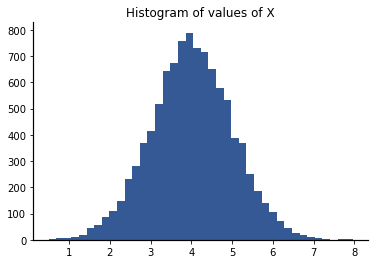

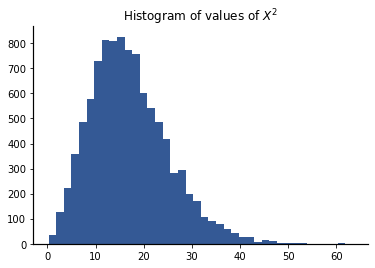

In [27]:
import scipy.stats as stats
import matplotlib.pyplot as plt

X=stats.norm(loc=4)
Xvals = X.rvs(10_000)
plt.hist(Xvals, 40)
plt.title('Histogram of values of X')
plt.figure()
plt.title('Histogram of values of $X^2$')
plt.hist(Xvals**2,40);

We can use the average of the data to estimate the expected values. Thus, the expected value of $X$ is approximately

In [28]:
Xvals.mean() 

4.010151583168886

We get an average which is very close to the true mean of 4. 

Now, let's estimate $E[X^2]$ by the average of the `Xvals ** 2`:

In [29]:
(Xvals ** 2).mean()

17.070232935696655

The average is approximately 17. Note that $E[X^2] \ne (E[X])^2$.

This seems like bad news because
1. we can't get $E[X^2]$ from $E[Z]$, and
2. we don't know how to get the distribution of $Y=X^2$ from the distribution of $Y$.

Fortunately, we can calculate moments without having to find the distribution of the random variable raised to some power using the LOTUS rule:

````{card}
DEFINITION
^^^
```{glossary}
Law of the Unconscious Statistician (LOTUS)
    Let $g(x)$ be a real function. If $X$ is a discrete random variable, then \[ E\left[ g(X) \right] = \sum_x g(x) p_X(x).\] If $X$ is a continuous random variable, then \[ E\left[ g(X) \right] = \int_{-\infty}^{\infty} g(x) f_X(x)~dx.\] 
```
````

It is called the "Law of the Unconscious Statistician" because it is what you might try if you didn't realize that $f(X)$ is itself a random variable with its own distribution that is different than that of $X$, and yet it can be proven to be correct.

Let's see what this means for our example of $E[X^2]$. We are evaluating $E[f(X)]$ for the function $g(x) = x^2$. Thus, by the LOTUS rule

\begin{align*}
E[X^2] &= \int_{-\infty} ^{\infty} g(x) f_X(x)~dx \\
&= \int_{-\infty} ^{\infty} x^2 f_X(x)~dx . \\
\end{align*}

## Examples

**Example: Find the mean and variance of an exponential random variable.**

Recall that the density of the exponential random variable is 

$$
f_X(x) = 
\begin{cases}
0, & x < 0 \\
\lambda e^{-\lambda x}, & x \ge 0
\end{cases}.
$$

Remember that `lambda` is a keyword, so we will use 'L' in place of `lambda` Let's import SymPy and set up our variables and density function:

In [20]:
import sympy as sp
x, L = sp.symbols("x,L")
fX = L * sp.exp(- L * x)

```{warning}

Note that we had to use SymPy's `sp.exp()` function, not NumPy's `np.exp()` function so that SymPy will know how to integrate it. This also demonstrates the importance of importing libraries into their own namespaces because otherwise, we have a potential confusion between these two functions.
```

We can first check that our pdf integrates to 1. To do that, we will need to learn that to  express $\infty$ in SymPy, we can use `sp.oo` (because `oo` looks like $\infty$).

In [25]:
sp.integrate(fX, (x, 0, sp.oo) )

Piecewise((1, Abs(arg(L)) < pi/2), (Integral(L*exp(-L*x), (x, 0, oo)), True))

We see that `sp.integrate()` can actually handle complex integration, but we only have real integration, so the first result applies. The integral of the pdf is 1.

Now let's compute the mean:

In [26]:
sp.integrate(x*fX, (x, 0, sp.oo) )

Piecewise((1/L, Abs(arg(L)) < pi/2), (Integral(L*x*exp(-L*x), (x, 0, oo)), True))

The mean is $1/\lambda$. Many engineers have this integral memorized; otherwise you may need to look it up in a table or perform integration by parts if you don't use SymPy. 

Let's calculate the variance:

In [33]:
muX = 1/L
sp.integrate( (x- muX)**2 * fX, (x, 0, sp.oo) )

Piecewise((L**(-2), Abs(arg(L)) < pi/2), (Integral(L*(x - 1/L)**2*exp(-L*x), (x, 0, oo)), True))

The variance of the exponential random variable is $\sigma_{X}^{2} = 1/\lambda^2$.

Note that we often compute the variance using a simpler formula. Consider the definition of the variance and expand the quadratic term:

$$
E\left[ \left( X - \mu_X \right)^2 \right] =
E\left[  X^2 - 2 \mu_X X + \mu_{X}^{2} \right] .
$$

Note that $\mu_X$ is some constant. Thus, we have a linear combination of terms, and expected value is a linear operator. We can thus rewrite this expression as 
$$
E\left[ \left( X - \mu_X \right)^2 \right] =
E\left[  X^2\right] - 2 \mu_X E \left[X\right]  + \mu_{X}^{2} .
$$

In the second term, $E[X] = \mu_X$. Then combining the second and third terms yields
$$
E\left[ \left( X - \mu_X \right)^2 \right] =
E\left[  X^2\right] -  \mu_{X}^{2} .
$$

Let's test this for the exponential random variable. If we find the 2nd moment, we get

In [34]:
sp.integrate( x**2 * fX, (x, 0, sp.oo) )

Piecewise((2/L**2, Abs(arg(L)) < pi/2), (Integral(L*x**2*exp(-L*x), (x, 0, oo)), True))

The result is $E[X^2] = 2/\lambda^2$.  Then the variance is 

$$
\sigma_{X}^{2} = E[X^2] - \mu_{X}^{2} = \frac{2}{\lambda^2} - \left(\frac 1 \lambda\right) ^2 = \frac{1}{\lambda^2},
$$
which agrees with our previous result.